# Test Data from Palmer

You can find information about the data set [here](https://catalog.data.gov/dataset/underway-pco2-measurements-in-surface-waters-and-the-atmosphere-during-the-r-v-nathaniel-b-palm).

[Color-blind friendly palettes](https://personal.sron.nl/~pault/).

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import ranksums
!pip install statsmodels
!pip install dash==2.6.0
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



con = sqlite3.connect('2022Cosmos13TestData.db')
cur = con.cursor()

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'Jinja2'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
<ipython-input-1-79d232a887cf>:21: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-79d232a887cf>:22: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
# joined_table
sql = '''
SELECT ph.level, lt.timestamp, lt.lat, lt.lon, lt.boat_id, temperature.degree, dissolved_solids.ppm
FROM location_time AS lt 
INNER JOIN ph
ON ph.locationtime_id = lt.id
INNER JOIN temperature
ON temperature.locationtime_id = lt.id
INNER JOIN dissolved_solids
ON dissolved_solids.locationtime_id = lt.id
'''
df_wtr = pd.read_sql(sql, con)
df_wtr.head()

,level,timestamp,lat,lon,boat_id,degree,ppm
0,405.81,2016-01-11 06:43:58,-58.680,-65.522,1,2.82,33.84
1,405.08,2016-01-11 06:47:40,-58.690,-65.517,1,2.78,33.83
2,404.47,2016-01-11 06:50:23,-58.698,-65.512,1,2.75,33.83
3,404.02,2016-01-11 06:53:07,-58.706,-65.508,1,2.72,33.82
4,403.64,2016-01-11 06:55:51,-58.711,-65.504,1,2.70,33.82


## Exploratory Data Analysis (EDA)

Charts, graphs, relationships between features.

In [ ]:
colors = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377']

sns.pairplot(
    data = df_wtr[['level', 'degree', 'ppm', 'boat_id']],
    hue='boat_id',
    palette=sns.color_palette(colors)
)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9878d23d30> (for post_execute):


KeyboardInterrupt: 

What trends do you see between features?

Do there appear to be correlations between level, ppm, and degree?

In [ ]:
corr = df_wtr[['level', 'degree', 'ppm', 'boat_id']].corr()
corr.style.background_gradient(cmap='coolwarm')


,level,degree,ppm,boat_id
level,1.000000,0.040953,0.308050,0.701517
degree,0.040953,1.000000,0.085616,0.496839
ppm,0.308050,0.085616,1.000000,0.369400
boat_id,0.701517,0.496839,0.369400,1.000000


The strongest correlations are between the same features. The weakest correlation is between ppm and level.

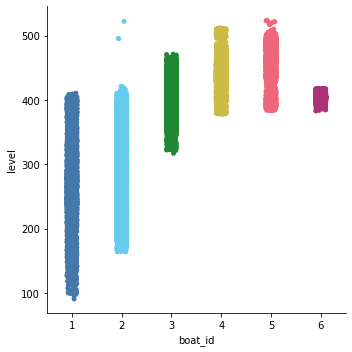

In [ ]:
sns.catplot(
    data=df_wtr,
    x='boat_id',
    y='level',
    palette=colors,
    kind='strip'
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad7152cb-d6c4-47fc-bce4-a1bd5240d55e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>